In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, AutoDateLocator


url_fr = "https://disease.sh/v3/covid-19/historical/France?lastdays=all"
url_it = "https://disease.sh/v3/covid-19/historical/Italy?lastdays=all"

resp_fr = requests.get(url_fr)
resp_it = requests.get(url_it)

resp_fr.raise_for_status()
resp_it.raise_for_status()

data_fr_js = resp_fr.json()
data_it_js = resp_it.json()

data_it = pd.DataFrame(data_it_js["timeline"])

# Convertire le date in formato datetime per l'asse x
data_it["date"] = pd.to_datetime(data_it.index)

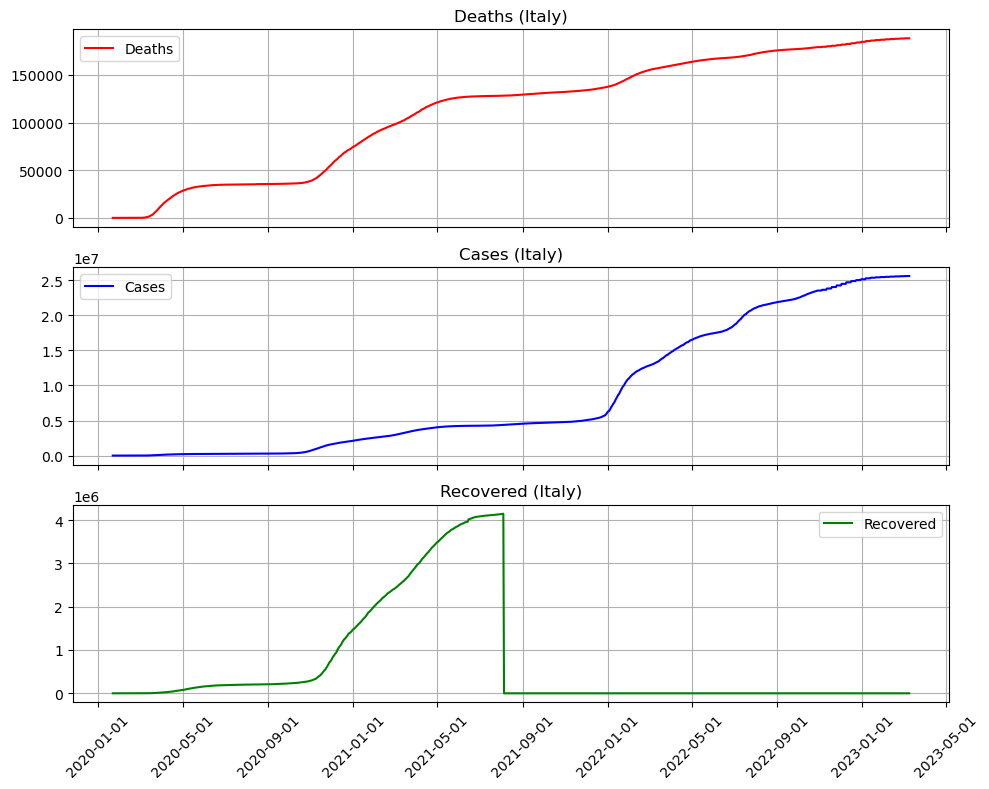

In [2]:


# Creare il grafico per i dati italiani
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Formattazione dell'asse x
date_locator = AutoDateLocator()
date_formatter = DateFormatter("%Y-%m-%d")

# Dati di decessi
axes[0].plot(data_it["date"], data_it["deaths"], label="Deaths", color="red")
axes[0].set_title("Deaths (Italy)")
axes[0].legend()

# Dati di casi
axes[1].plot(data_it["date"], data_it["cases"], label="Cases", color="blue")
axes[1].set_title("Cases (Italy)")
axes[1].legend()

# Dati di guarigioni
axes[2].plot(data_it["date"], data_it["recovered"], label="Recovered", color="green")
axes[2].set_title("Recovered (Italy)")
axes[2].legend()


# Configurare l'asse x per tutti i subplot
for ax in axes:
    ax.xaxis.set_major_locator(date_locator)
    ax.xaxis.set_major_formatter(date_formatter)
    ax.grid(True)

plt.xticks(rotation=45)  # Ruota le etichette dell'asse x per renderle leggibili
plt.tight_layout()
plt.show()

In [ ]:
provo